In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('movies.csv')
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [5]:
data = data.drop('movieId',axis='columns')
data

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memory usage: 152.3+ KB


In [7]:
data.genres[0]

'Adventure|Animation|Children|Comedy|Fantasy'

In [8]:

genres_l = []
for i in range(0,len(data)):
    a = data.genres[i]
    l = list(a.split('|'))
    for a in l:
        if a not in genres_l:
            genres_l.append(a)
genres_l

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [9]:
def ohe(text,col):
    column=[]
    for i in range(0,len(data)):
        a = text[i]
        if col in a:
            column.append(1)
        else:
            column.append(0)
    return pd.Series(column)
    
for col in genres_l:
    data[col] = ohe(data.genres,col)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               9742 non-null   object
 1   genres              9742 non-null   object
 2   Adventure           9742 non-null   int64 
 3   Animation           9742 non-null   int64 
 4   Children            9742 non-null   int64 
 5   Comedy              9742 non-null   int64 
 6   Fantasy             9742 non-null   int64 
 7   Romance             9742 non-null   int64 
 8   Drama               9742 non-null   int64 
 9   Action              9742 non-null   int64 
 10  Crime               9742 non-null   int64 
 11  Thriller            9742 non-null   int64 
 12  Horror              9742 non-null   int64 
 13  Mystery             9742 non-null   int64 
 14  Sci-Fi              9742 non-null   int64 
 15  War                 9742 non-null   int64 
 16  Musical             9742

In [11]:
data  = data.drop('genres',axis ='columns')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               9742 non-null   object
 1   Adventure           9742 non-null   int64 
 2   Animation           9742 non-null   int64 
 3   Children            9742 non-null   int64 
 4   Comedy              9742 non-null   int64 
 5   Fantasy             9742 non-null   int64 
 6   Romance             9742 non-null   int64 
 7   Drama               9742 non-null   int64 
 8   Action              9742 non-null   int64 
 9   Crime               9742 non-null   int64 
 10  Thriller            9742 non-null   int64 
 11  Horror              9742 non-null   int64 
 12  Mystery             9742 non-null   int64 
 13  Sci-Fi              9742 non-null   int64 
 14  War                 9742 non-null   int64 
 15  Musical             9742 non-null   int64 
 16  Documentary         9742

In [12]:
data.to_csv('ohe_movies.csv',index=False)

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:>

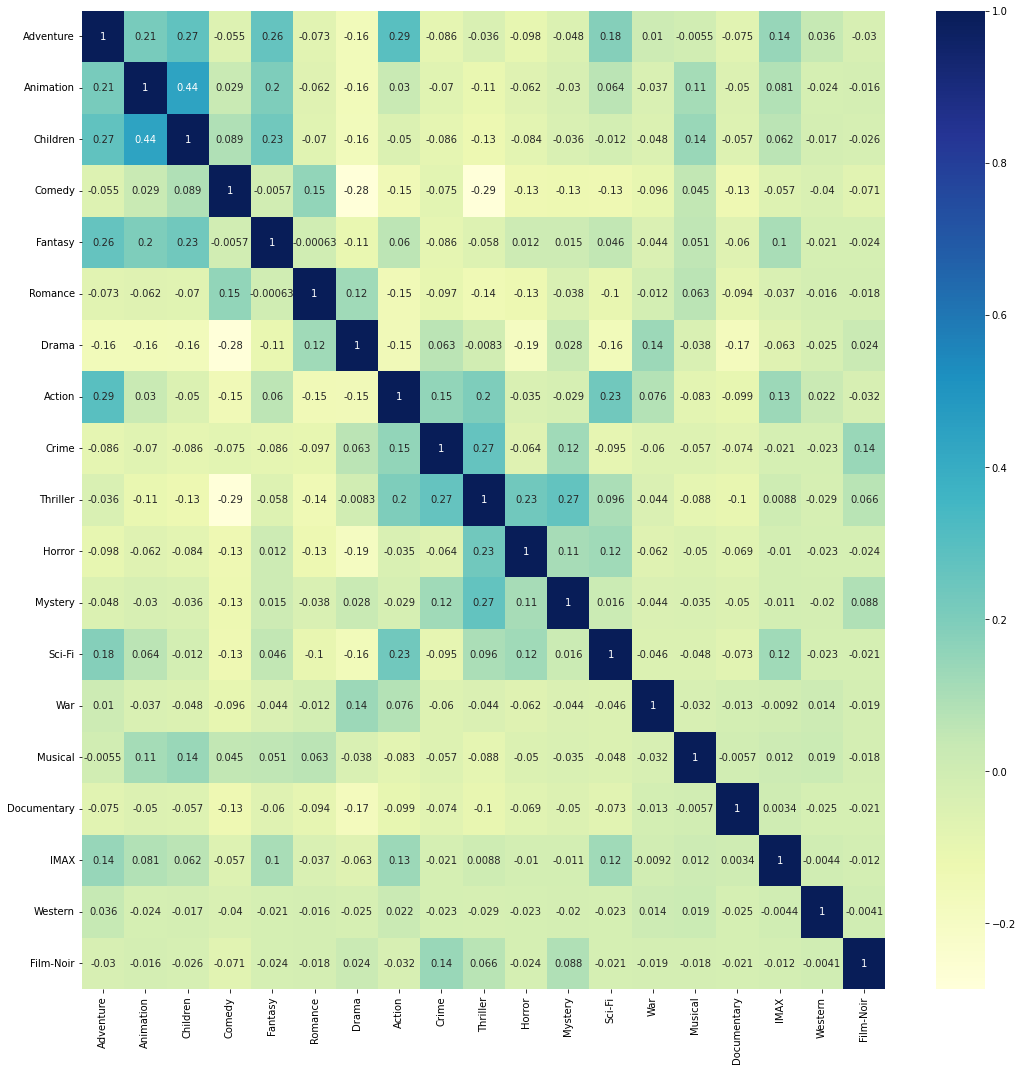

In [14]:
a = data.drop(['title','(no genres listed)'],axis = 1)
sns.set_palette("Reds", 8, .75)
plt.figure(figsize=(18,18))
sns.heatmap(a.corr(),cmap="YlGnBu", annot=True)

In [15]:
a = data.drop('title',axis = 1)
a.columns

Index(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
       'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir',
       '(no genres listed)'],
      dtype='object')

In [16]:
def find_count(series):
    count = 0
    for i in series:
        if i == 1:
            count+=1
    return count

count_genre = []
for col in a.columns:
    aaa = find_count(data[col])
    count_genre.append(aaa)

Text(0.5, 1.0, 'Genre Percentage of Movies')

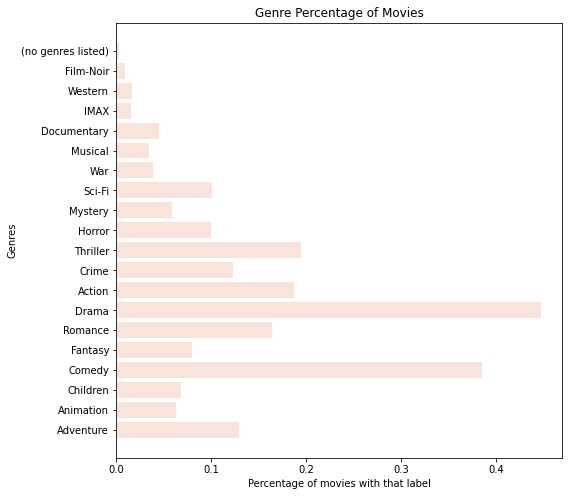

In [17]:
count_genre = np.array(count_genre)
plt.figure(figsize=(8,8))
plt.barh(a.columns,count_genre/len(data))
plt.ylabel("Genres")
plt.xlabel("Percentage of movies with that label")
plt.title("Genre Percentage of Movies")


#### -> More than 35% and 40% of our dataset has Drama or Comedy as one of their genre

In [31]:
data_clean = data.drop('title',axis=1)
data_clean.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


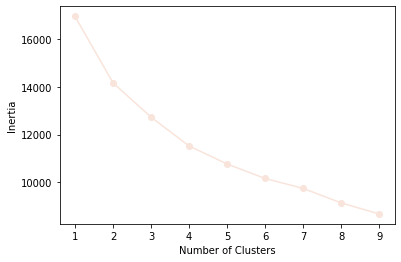

In [19]:
from sklearn.cluster import KMeans

inertia = []
list_num_clusters = list(range(1,10))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(data_clean)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

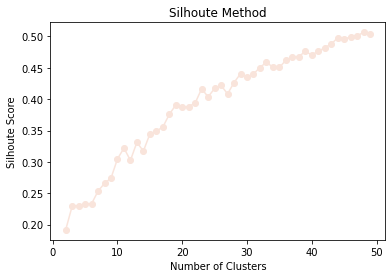

In [20]:
from sklearn.metrics import silhouette_score as sscore 

list_num_clusters = list(range(2,50))
silhoute_score = []
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(data_clean)
    a =sscore(data_clean,km.labels_,metric='euclidean')
    silhoute_score.append(a)
plt.plot(list_num_clusters,silhoute_score)
plt.scatter(list_num_clusters,silhoute_score)
plt.title('Silhoute Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoute Score');
    

In [21]:
# from sklearn.cluster import KMeans

# inertia = []
# list_num_clusters = list(range(100,300))
# for num_clusters in list_num_clusters:
#     km = KMeans(n_clusters=num_clusters)
#     km.fit(data_clean)
#     inertia.append(km.inertia_)
    
# plt.plot(list_num_clusters,inertia)
# plt.scatter(list_num_clusters,inertia)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia');

In [34]:
km = KMeans(n_clusters = 6)
pred = km.fit_predict(data_clean)

<AxesSubplot:>

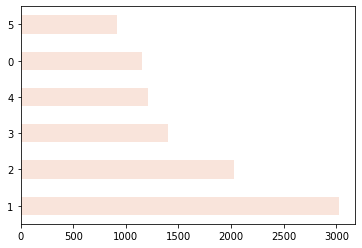

In [35]:
cls = pd.Series(pred)
m = cls.value_counts()
m.plot(kind ='barh')

In [36]:
data_obv= pd.read_csv('movies.csv')
data_obv = data_obv.drop('movieId',axis=1)
data_obv['classes'] =  cls
data_obv.head(10)

,title,genres,classes
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2
1,Jumanji (1995),Adventure|Children|Fantasy,0
2,Grumpier Old Men (1995),Comedy|Romance,5
3,Waiting to Exhale (1995),Comedy|Drama|Romance,5
4,Father of the Bride Part II (1995),Comedy,2
5,Heat (1995),Action|Crime|Thriller,3
6,Sabrina (1995),Comedy|Romance,5
7,Tom and Huck (1995),Adventure|Children,0
8,Sudden Death (1995),Action,3
9,GoldenEye (1995),Action|Adventure|Thriller,3


In [38]:
data_obv.to_csv('Movie_recommendatioin.csv')

In [39]:
import pickle
pickle.dump(km,open('k_means_movies.pkl','wb'))